# Laboratory N°2 Network Science - Network Projections


## Temática del Dataset: Número de personas que contrajeron COVID

Este es un conjunto de datos generado aleatoriamente para ilustrar la construcción de redes bipartitas a partir de conjuntos de datos tabulares empíricos.

En este conjunto de datos, hay variantes de COVID y los nombres enumerados para cada variante son aquellos que fueron infectados con esa variante.

El objetivo de este laboratorio es familiarizarse con este tipo de datos estructurados que no están en forma de lista de aristas, sino que se asemejan a fuentes de datos de investigaciones empíricas. A partir de estos datos, deberías ser capaz de crear una red bipartita, así como la lista de nodos y la lista de aristas para cada una de las proyecciones de la red.

## Primera parte ( Análisis Red Bipartita)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
data = pd.read_csv('COVIDvariants.csv')

In [3]:
data.head()

,Variant1,Variant2,Variant3,Variant4,Variant5,Variant6,Variant7,Variant8,Variant9,Variant10
0,Charlie,Frank,Quinn,Oliver,Charlie,Helen,Grace,Rachel,Michael,Grace
1,Sam,David,David,Nina,Nadia,Bob,Ivy,Laura,Tina,Ronald
2,Nina,Oliver,Charlie,Helen,Paul,Eva,Quinn,Sam,Ivy,Bob
3,Alice,Quinn,Bob,Quinn,Sam,Jack,Kevin,Michael,Frank,Nina
4,Kevin,Sam,Rachel,Jack,Kevin,Frank,Eva,Alice,Quinn,Laura


### El primer paso es convertir el conjunto de datos en la lista de aristas de una red bipartita
- Para ello, se utiliza la función de python 'melt', dejando la primera columna el nombre de la variante de COVID 'variant' y la segunda columna el nombre de la persona infectada 'name'.
- Cada fila representa una arista o enlace que conecta a la persona con la variante de COVID infectada.

In [4]:
df = data.melt(var_name='variant', value_name='name').dropna()

df.head()

,variant,name
0,Variant1,Charlie
1,Variant1,Sam
2,Variant1,Nina
3,Variant1,Alice
4,Variant1,Kevin


### A partir de la lista de aristas anterior, se crea la red bipartita:

In [5]:
g=nx.Graph()

In [6]:
g = nx.from_pandas_edgelist(df, source='variant', target='name')

### Información básica del grado:

In [7]:
print(f'El núnero de nodos del grafo es: {g.number_of_nodes()} y el núnero de enlaces es: {g.number_of_edges()}')

El núnero de nodos del grafo es: 69 y el núnero de enlaces es: 221


In [8]:
average_degree_bipartite = sum(dict(g.degree()).values()) / g.number_of_nodes()
print(f'El grado promedio de la red bipartita original es: {average_degree_bipartite}')

El grado promedio de la red bipartita original es: 6.405797101449275


In [9]:
variants = list(df.variant.unique())

In [10]:
people = list(df.name.unique())

In [11]:
layout = nx.spring_layout(g, k=0.05, iterations=50)

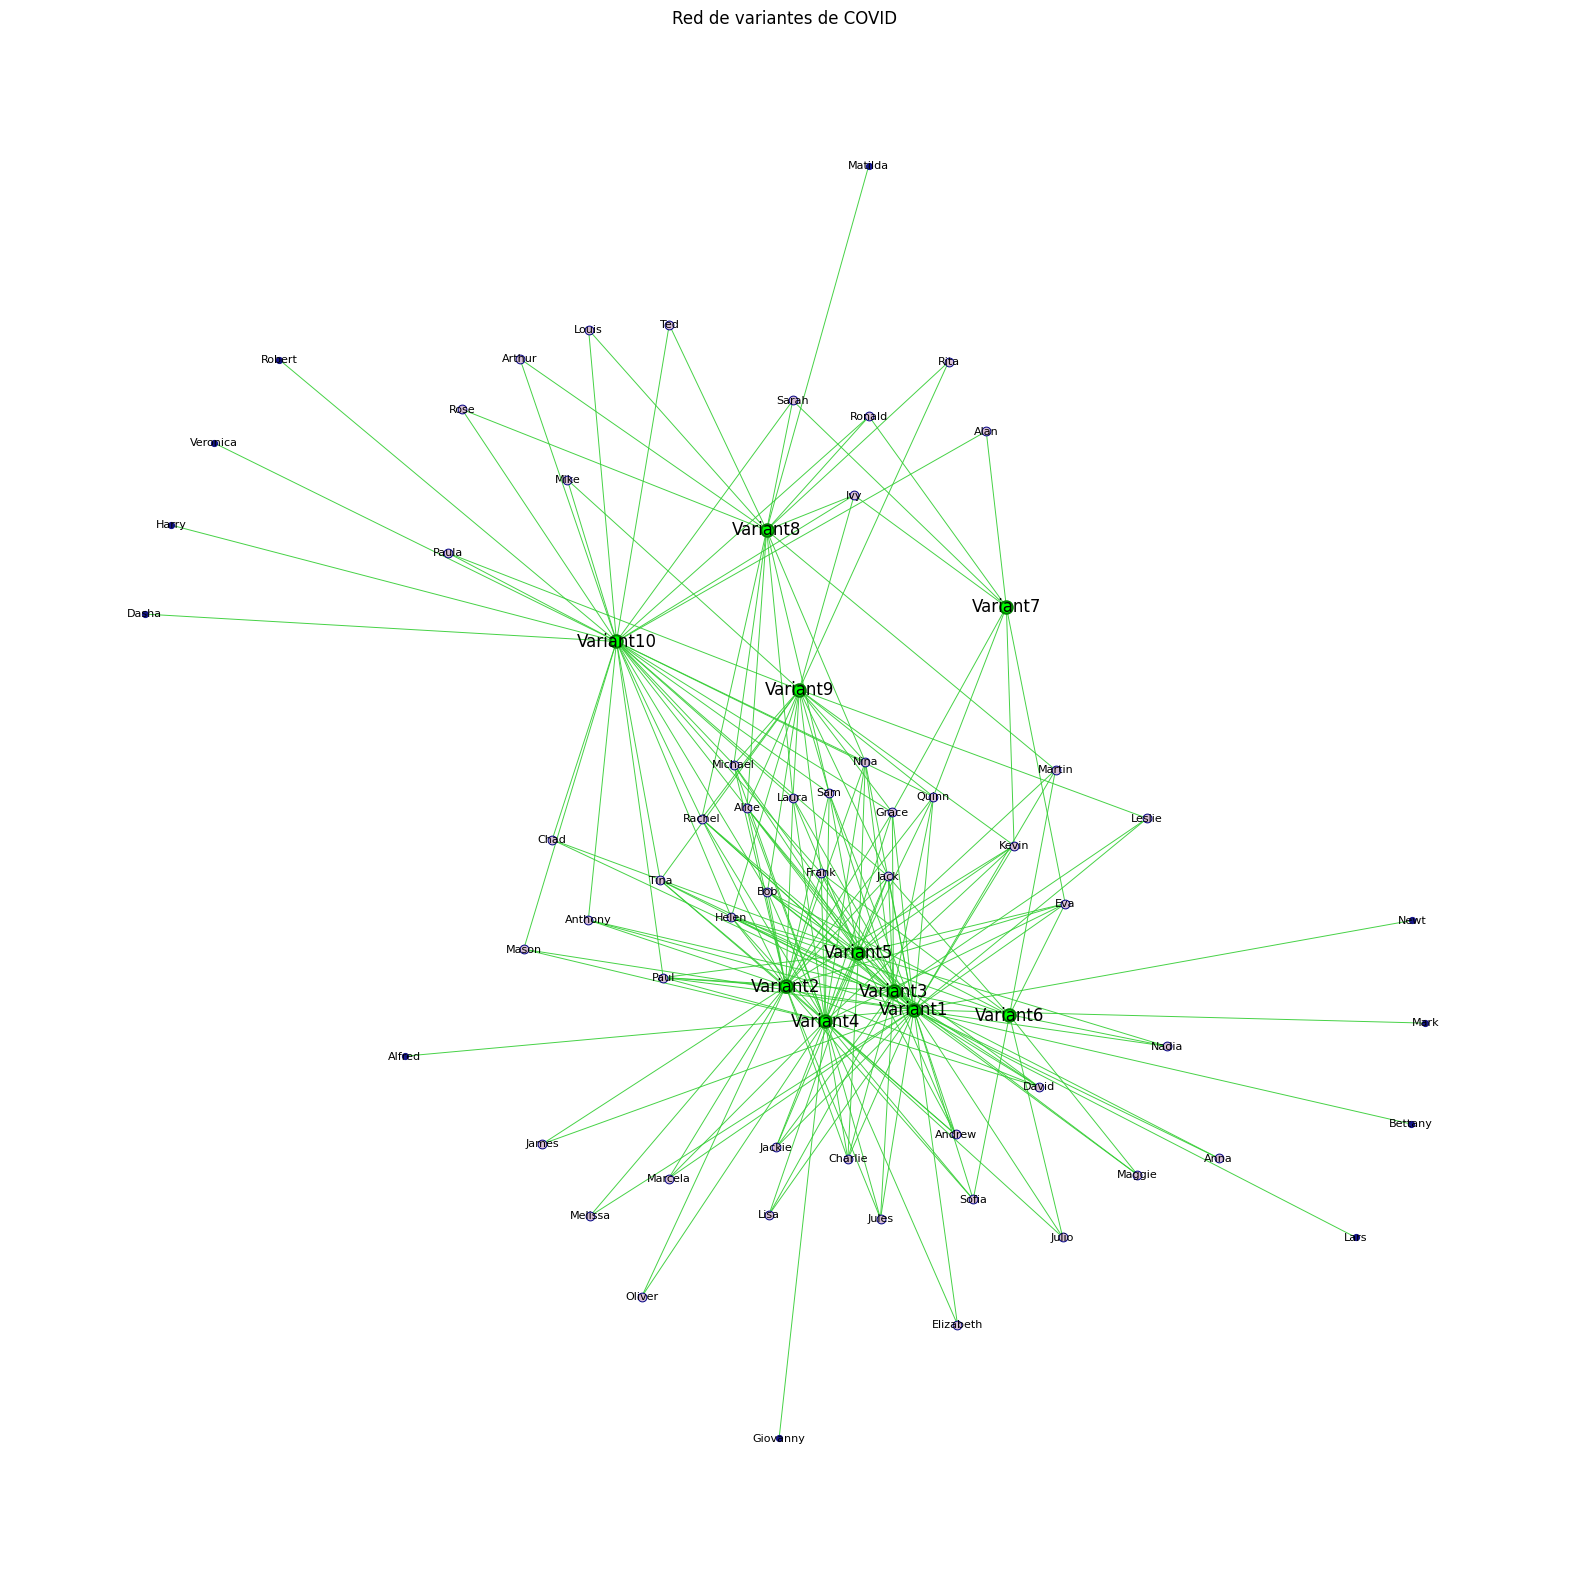

In [42]:
plt.figure(figsize=(20, 20))

# Draw VARIANTS
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=variants, 
                       node_size=80, # a LIST of sizes, based on g.degree
                       node_color='lime',
                       edgecolors='green', 
                       linewidths=1.5)


# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=people, 
                       node_color='navy', 
                       edgecolors='navy',
                       alpha=0.9,
                       linewidths=0.7, 
                       node_size=20)


# Draw REINFECTED PEOPLE
reinfected_people = [person for person in people if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=reinfected_people, 
                       node_color='thistle', 
                       edgecolors='navy',
                       linewidths=0.7,
                       node_size=40)

nx.draw_networkx_edges(g, layout, width=0.7, alpha=0.9,
                       edge_color="limegreen")

# # label people
node_labels = dict(zip(people, people))
nx.draw_networkx_labels(g, layout, labels=node_labels,
                        font_size=8, font_weight='400')


# # label variants
node_variants = dict(zip(variants, variants))
nx.draw_networkx_labels(g, layout, labels=node_variants,
                        font_size=12, font_weight='400')



# Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Red de variantes de COVID")
# plt.savefig('network_name.pdf', bbox_inches='tight', pad_inches=0)
# Tell matplotlib to show it
plt.show()

### ¿Cuál es la naturaleza de la relación entre los dos conjuntos de nodos en la red bipartita?
- La relación entre los dos conjuntos en la red bipartita representa la infección de COVID en un grupo de personas, en otras palabras, un conjunto de nodos (verde) representa las variantes de COVID, y el otro conjunto (nodos rosado y azul) representa a las personas infectadas 
- Una arista o enlace entre un nodo de variante y un nodo de persona indica que la persona fue infectada por esa variante en específico.

### ¿Existen medidas específicas para la centralidad e influencia de nodos en redes bipartitas?
- En redes bipartitas, la centralidad de grado, puede no ser aplicable o interpretada en comparación a las redes unipartitas, sin embargo, se pueden adaptar medidas específicas en redes bipartitas, como por ejemplo, la centralidad de grado ponderada o grado promedio.
- En este caso específico, donde la red bipartita representa personas y variantes de COVID y no se tiene información adicional que justifique el peso en las conexiones, como por ejemplo la severidad de la infección, la frecuencia de reinfección, etc., entonces la centralidad de grado ponderada no sería aplicable.
- En este caso las aristas no son ponderadas, solo representan la existencia o ausencia de una relación, es decir, si una persona infectada fue infectada o no por una variante específica de COVID. Por lo tanto, las medidas de centralidad se basan solo en el conteo de conexiones.


### ¿Cuáles son las redes proyectadas de cada conjunto de nodos? (es decir, redes separadas para cada conjunto)

- Las redes proyectadas son redes unipartitas:
    - En este caso, la primera proyección son las personas infectadas, es decir, los nodos son individuos y dos personas están conectadas si compartieron una variante de COVID.
    - La otra proyección es de variantes de COVID, ya que los nodos son variantes, y dos variantes están conectadas si fueron compartidas por la misma persona.

### A continuación de construirá la matriz de adyacencia de sus dos proyecciones, en los nodos morados y en los nodos verdes, respectivamente. 

In [13]:
print(g)

Graph with 69 nodes and 221 edges


In [14]:
# Asignar atributos bipartitos a los nodos
for node in g.nodes():
    if node in df['variant'].unique():
        g.nodes[node]['bipartite'] = 0 # Variante
    else:
        g.nodes[node]['bipartite'] = 1 # Persona

# Proyección de la red sobre las personas infectadas
people = [n for n in g.nodes() if g.nodes[n]['bipartite'] == 1]
people_net = nx.bipartite.projected_graph(g, people)

# Proyección de la red sobre las variantes de COVID
variants = [n for n in g.nodes() if g.nodes[n]['bipartite'] == 0]
variants_net = nx.bipartite.projected_graph(g, variants)

# Matrices de adyacencia para cada proyección
people_adj_matrix = nx.adjacency_matrix(people_net).todense()
variants_adj_matrix = nx.adjacency_matrix(variants_net).todense()

# Mostrar las matrices de adyacencia
print('Matriz de Adyacencia - Proyección de Personas:')
print(people_adj_matrix)
print('\nMatriz de Adyacencia - Proyección de Variantes:')
print(variants_adj_matrix)

Matriz de Adyacencia - Proyección de Personas:
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 1 0 1]
 [0 1 1 ... 1 1 0]]

Matriz de Adyacencia - Proyección de Variantes:
[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


La Matriz de Adyacencia es una forma de representar las relaciones entre los nodos de un solo tipo, basándose en las conexiones compartidas con nodos del otro tipo. En este caso, se crearon dos proyecciones, una para las personas infectadas y otra para las variantes de COVID.

- Proyección de personas:
    - La matriz de adyacencia tiene una fila y una columna por cada persona.
    - Valor 1 es si las dos personas correspondientes a esa fila y columna comparten al menos una variante de COVID.
    - Valor 0 si esas dos personas correspondientes a esa fila y columna NO comparten variantes de COVID.
    

- Proyección de variantes:
    - La matriz para esta proyección tiene una fila y una columna para cada variante.
    - Valor 1 si las dos variantes correspondientes a esa fila y columna son compartidas por al menos una persona.
    - Valor 0 si las dos variantes no son compartidas por ninguna persona.

Las matrices de adyacencia anteriormente descritas permitirían analizar la estructura y las relaciones dentro de cada conjunto de nodos. Por ejemplo, en la proyección de personas, se puede identificar personas que están más estrechamente relacionadas en términos de las variantes de COVID que han contraído, lo que podría ser útil para entender cómo se propaga la enfermedad.


## Segunda parte (Proyección de redes bipartitas):



### Proyección de personas infectadas (Red Unipartita)

In [15]:
proyeccion_df=df.pivot_table(index='variant',columns=df.groupby('variant').cumcount(),values='name',aggfunc='first')
proyeccion_df.columns=[f'Nombre{i+1}' for i in range(proyeccion_df.shape[1])]

In [16]:
origen=[]
destino=[]

In [17]:
for index, row in proyeccion_df.iterrows():
    for i, name1 in enumerate(row):
        for j, name2 in enumerate(row[i+1:]):
            origen.append(name1)
            destino.append(name2)

In [18]:
personas_df=pd.DataFrame({'Origen':origen,'Destino':destino}) #DataFrame a partir de las listas de origen y destino

In [19]:
personas_df.head()

,Origen,Destino
0,Charlie,Sam
1,Charlie,Nina
2,Charlie,Alice
3,Charlie,Kevin
4,Charlie,Helen


In [20]:
personas_df = personas_df.dropna().drop_duplicates()

In [21]:
personas_df = personas_df[personas_df['Origen'] != personas_df['Destino']]

#### Red de la proyección:

In [22]:
h = nx.from_pandas_edgelist(personas_df, source='Origen', target='Destino')


#### Información básica de la proyección:

In [23]:
print(h)

Graph with 59 nodes and 1265 edges


In [24]:
average_degree_people = sum(dict(h.degree()).values()) / h.number_of_nodes()
print(f'El grado promedio de la proyección de personas infectadas es: {average_degree_people}')

El grado promedio de la proyección de personas infectadas es: 42.88135593220339


#### Visualización de la proyección de personas infectadas:

In [25]:
labels = {node: h.nodes[node].get('label', f'Node {node}') for node in h.nodes}

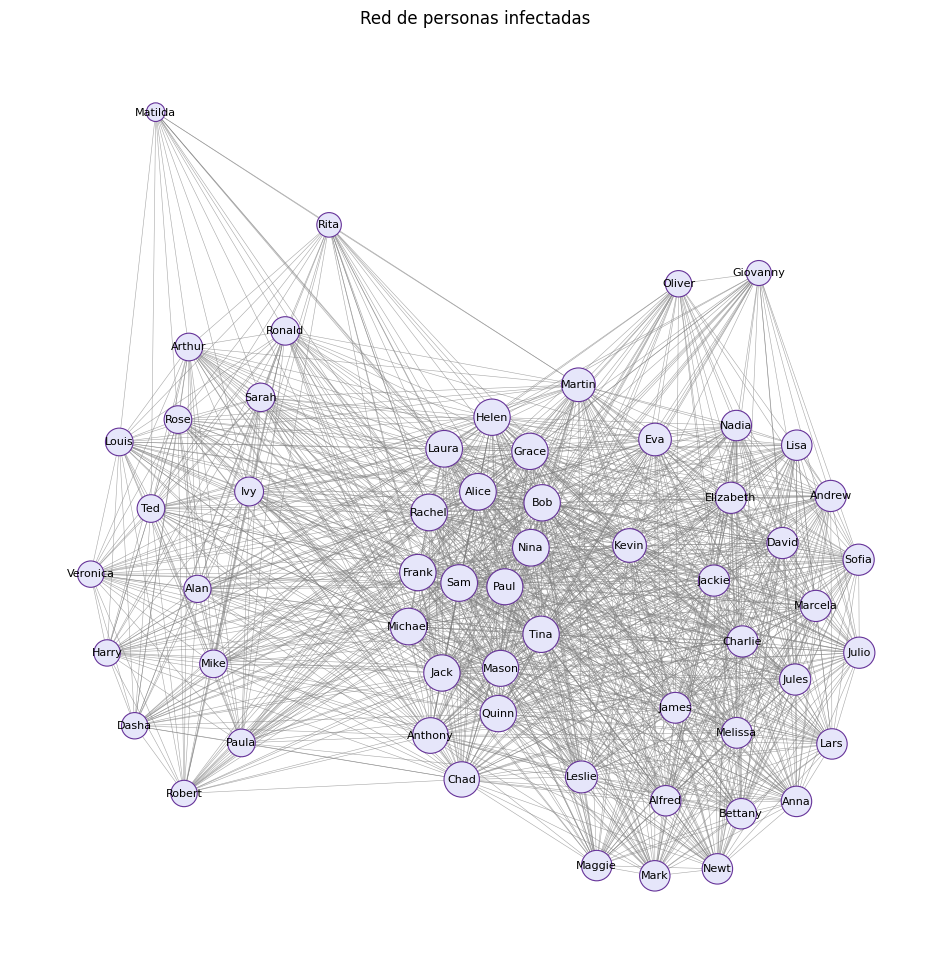

In [26]:
layout_h = nx.spring_layout(h, k=0.1, iterations=1000)

# Configurar la figura para la visualización
plt.figure(figsize=(12, 12))

# nodos
nx.draw_networkx_nodes(h, layout_h, node_size=[(h.degree(v)) * 12 for v in h.nodes()], node_color='lavender', edgecolors='rebeccapurple', linewidths=0.8)

# aristas
nx.draw_networkx_edges(h, layout_h, width=0.4, alpha=0.7, edge_color="gray")

# Etiquetas (nombres de personas)
node_labels = {node: node for node in h.nodes()}
nx.draw_networkx_labels(h, layout_h, labels=node_labels, font_size=8)

plt.axis('off')
plt.title("Red de personas infectadas")
plt.show()

### Proyección de variantes COVID (Red Unipartita)


In [27]:
# Proyección de la red sobre las variantes:
proyeccion_variantes_df = df.pivot_table(index='name', columns=df.groupby('name').cumcount(), values='variant', aggfunc='first')
proyeccion_variantes_df.columns = [f'Variante{i+1}' for i in range(proyeccion_variantes_df.shape[1])]

origen_variantes = []
destino_variantes = []

In [28]:
for index, row in proyeccion_variantes_df.iterrows():
    for i, variante1 in enumerate(row):
        for j, variante2 in enumerate(row[i+1:]):
            origen_variantes.append(variante1)
            destino_variantes.append(variante2)

variantes_df = pd.DataFrame({'Origen': origen_variantes, 'Destino': destino_variantes})

In [29]:
variantes_df = variantes_df.dropna().drop_duplicates()
variantes_df = variantes_df[variantes_df['Origen'] != variantes_df['Destino']]

In [30]:
variantes_df.head()

,Origen,Destino
0,Variant7,Variant10
56,Variant1,Variant2
57,Variant1,Variant3
58,Variant1,Variant4
59,Variant1,Variant5


#### Red de la proyección:

In [31]:
g_variantes = nx.from_pandas_edgelist(variantes_df, source='Origen', target='Destino')

#### Información básica de la proyección:

In [32]:
print(g_variantes)
average_degree_variants = sum(dict(g_variantes.degree()).values()) / g_variantes.number_of_nodes()
print(f'El grado promedio de la proyección de variantes de COVID es: {average_degree_variants}')

Graph with 10 nodes and 45 edges
El grado promedio de la proyección de variantes de COVID es: 9.0


#### Visualización de la proyección de variantes de COVID:

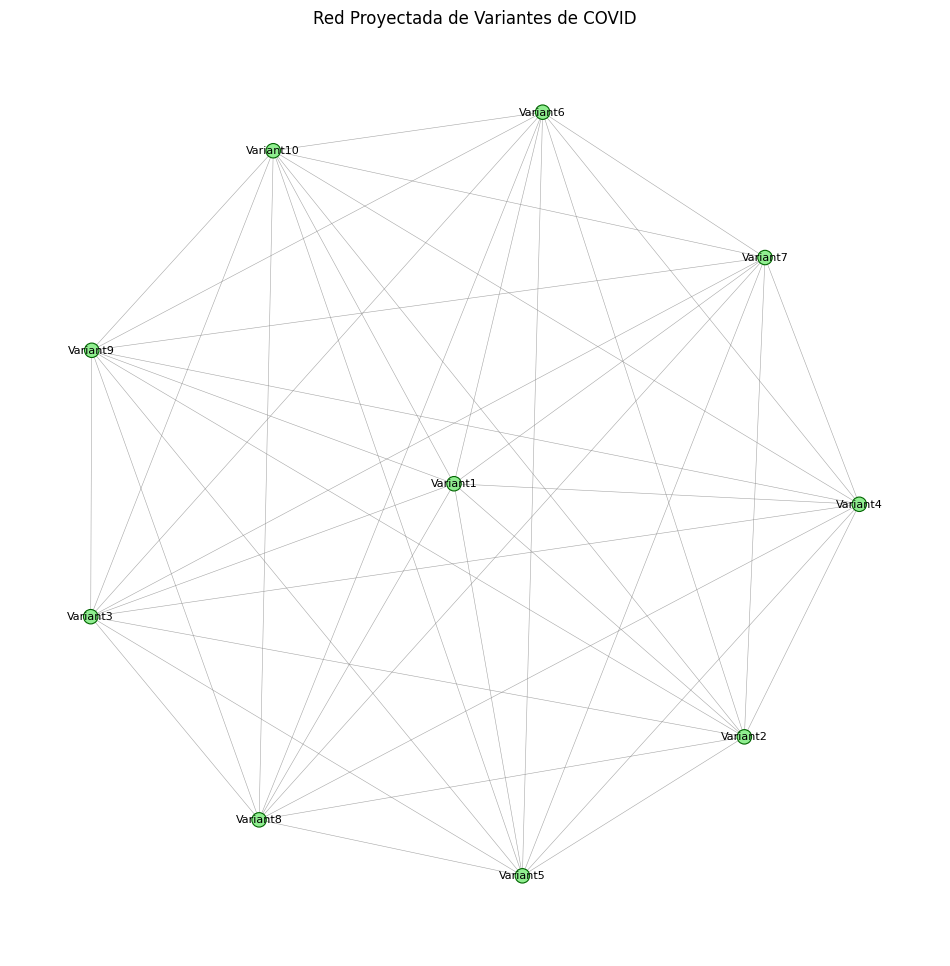

In [33]:
layout_g_variantes = nx.spring_layout(g_variantes, k=0.1, iterations=1000)

plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(g_variantes, layout_g_variantes, node_size=[(g_variantes.degree(v)) * 12 for v in g_variantes.nodes()], node_color='lightgreen', edgecolors='darkgreen', linewidths=0.8)

nx.draw_networkx_edges(g_variantes, layout_g_variantes, width=0.4, alpha=0.7, edge_color="gray")

node_labels_variantes = {node: node for node in g_variantes.nodes()}
nx.draw_networkx_labels(g_variantes, layout_g_variantes, labels=node_labels_variantes, font_size=8)

plt.axis('off')
plt.title("Red Proyectada de Variantes de COVID")
plt.show()

### ¿Cuáles son las redes proyectadas de cada conjunto de nodos? (es decir, redes separadas para cada conjunto)
- Red proyectada de personas infectadas.
- Red proyectada de variantes de COVID. (variantes que fueron compartidas por la misma persona)

### ¿Qué información se puede obtener de cada proyección?

- Red proyectada de personas infectadas:
    - Red proyectada de 59 nodos y 1265 grados, es decir, hay 59 personas y 1265 enlaces, cada enlace o aristas representan las conexiones entre las personas, lo que siginifica que están relacionadas entre sí a través de las variantes de COVID que han contraído.
    - El grado promedio de la proyección es 42.88 (de un total de 59 nodos). Lo que indica que, en promedio, cada persona comparte variantes de COVID con aproximadamente 42.88 otras personas. Considerando que el número máximo de conexiones que una persona podría tener en esta red es de 58, un grado promedio de 42.88 indica una alta interconexión entre las personas en términos de las variantes COVID que han contraído.



- Red proyectada de variantes COVID:
    - Red proyectada de 10 nodos y 45 grados, estos 10 nodos representan las diferentes variantes de COVID. Las 45 aristas o grados indican las conexiones entre estas variantes, es decir, cada persona que tuvo esas dos variantes, en otras palabras, las variantes de COVID están relacionadas entre sí a través de las personas que han sido infectadas.
    - El grado promedio de 9 en la red de 10 nodos totales, sugiere que cada variante de COVID está conectada con 9 de las otras 9 variantes. Esto puede interpretarse como una indicación de que muchas personas han sido infectadas por múltiples variantes de COVID y que todas las variantes están conectadas entre sí a través de las personas.

### ¿Cuál es la utilidad de las proyecciones de redes con respecto a la visualización y análisis de la red bipartita?

- Mediante la proyección de redes (personas infectadas y variantes COVID), se logra la simplificación de la estructura de la red bipartita, facilitando la visualización y análisis. 

- Las proyecciones permiten revelar relaciones y estructuras que no son evidentes en la red bipartita, Por ejemplo, en el grafo de la proyección de personas, se puede identificar grupos o clusters de personas que están más estrechamente relacionadas (en términos de infección). En el grafo se visualizan 3 grandes grupos de personas, y personas fuera de estos grupos, no obstante, de igual forma interactuan con múltiples personas. Otro ejemplo, es en el grafo de variantes COVID, gracias a esta proyección se puede entender cómo se relacionan las variantes, algo que hubiera sido complejo analizando solo la red bipartita.



### A continuación se calculará el grado promedio de cada proyección de la red, luego se calculará el grado promedio de los nodos morados y los nodos verdes en la red bipartita. 
- ¿Cuáles son las diferencias en la distribución?

In [34]:
# Grado promedio de la proyección de personas infectadas:
average_degree_projection_people = sum(dict(h.degree()).values()) / h.number_of_nodes()
print(f'El grado promedio de la proyección de personas infectadas es: {average_degree_projection_people}')

El grado promedio de la proyección de personas infectadas es: 42.88135593220339


In [35]:
# Grado promedio de la proyección de variantes COVID:
average_degree_projection_variants = sum(dict(g_variantes.degree()).values()) / g_variantes.number_of_nodes()
print(f'El grado promedio de la proyección de variantes COVID: {average_degree_projection_variants}')

El grado promedio de la proyección de variantes COVID: 9.0


In [36]:
# Grado promedio de los nodos morados en la red bipartita (personas)
grados_personas = [g.degree(person) for person in people]
grado_promedio_personas = sum(grados_personas) / len(grados_personas)
print(f"Grado promedio de los nodos morados de la red bipartita (personas): {grado_promedio_personas}")

# Grado promedio de los nodos verdes en la red bipartita (variantes)
grados_variantes = [g.degree(variant) for variant in variants]
grado_promedio_variantes = sum(grados_variantes) / len(grados_variantes)
print(f"Grado promedio de los nodos verdes de la red bipartita (variantes): {grado_promedio_variantes}")


Grado promedio de los nodos morados de la red bipartita (personas): 3.7457627118644066
Grado promedio de los nodos verdes de la red bipartita (variantes): 22.1


- Proyección de personas infectadas (Grado promedio 42.88):
    - Indica una interconexión densa entre las personas. Dado que una persona puede estar infectada por múltiples variantes y una variante puede infectar a muchas personas, esto lleva a una red altamente interconectada en la proyección de personas.

- Proyección de variantes COVID (Grado promedio 9.0):
    - Indica que las variantes están menos interconectadas entre sí en comparación con las conexiones entre personas, lo que sugiere que aunque algunas variantes son comunes entre múltiples personas, hay menos superposición en las variantes que infectan a diferentes personas.

- Nodos morados en la red bipartita (personas) (Grado promedio 3.75):
    - En promedio cada persona ha sido infectada por un número pequeño de variantes diferentes.

- Nodos verdes en la red bipartita (variantes) (Grado promedio: 22.1):
    - Cada variante ha infectado a un número significativo de personas, por lo tanto podría reflejar la presencia de algunas variantes prevalentes que han infectado a muchas personas.

- Explicación de las Diferencias:
    - La diferencia entre los grados promedio de personas y variantes en la red bipartita reflejan la naturaleza asimétrica de la infección, es decir, que una variante puede infectar a muchas personas, pero una persona generalmente no contrae muchas variantes diferentes.
    - Las diferencias entre los grados promedio de las proyecciones y la red bipartita se deben a la transformación de conexiones indirectas en directas en las proyecciones.
        - Proyección de personas vs nodos morados de la red bipartita:
            - En la proyección de personas infectadas, dos personas están conectadas si comparten al menos una variante de COVID, lo que peude llevar a muchas conexiones indirectas entre personas. En cambio en los nodos morados de la red bipartita, el grado representa el número de variantes diferentes que han infectado a esa persona. Por lo tanto, la gran diferencia entre la proyección de personas y los nodos morados de la red bipartita es que, la proyección de personas transforma conexiones indirectas (una variante común) en conexiones directas, lo que aumenta significativamente el número de conexiones entre personas en comparación con la red bipartita.
        - Proyección de variantes COVID vs nodos verdes de la red bipartita:
            - La proyección de variantes refleja las conexiones indirectas entre variantes a través de personas comunes. En cambio, en la red bipartita el grado de una variante se basa únicamente en cuántas personas ha infectado directamente, sin considerar las conexiones indirectas.


### Computación de las propiedades de estas redes proyectadas (Tamaño, densidad, diámetro, distribución de grados).

In [37]:
# Tamaño de la red
size = h.number_of_nodes()

# Densidad de la red (número de aristas dividido por el número de aristas posibles), considerando que en una red no dirigida, el número de aristas posibles es n(n-1)/2, donde n es el número de nodos
density = nx.density(h)

# Diámetro de la red (mayor distancia entre cualquier par de nodos), el diámetro se calcula solo si la red es conexa
diameter = nx.diameter(h) if nx.is_connected(h) else 'No conexa'

# Distribución de grados (distribución de la frecuencia de los grados de los nodos en la red)
degree_distribution = [h.degree(n) for n in h.nodes()]

# Mostrar los resultados
print('Tamaño de la red:',size)
print('Densidad de la red:',density)
print('Diametro de la red:',diameter)
print('Distribución de grados:',degree_distribution)

Tamaño de la red: 59
Densidad de la red: 0.739333722969024
Diametro de la red: 2
Distribución de grados: [42, 58, 58, 58, 49, 57, 56, 57, 57, 58, 57, 58, 40, 42, 57, 46, 57, 58, 57, 40, 54, 49, 41, 42, 40, 40, 42, 56, 42, 42, 55, 41, 40, 42, 42, 44, 42, 40, 40, 40, 40, 35, 36, 32, 33, 33, 30, 30, 30, 33, 35, 33, 33, 33, 30, 30, 27, 26, 15]


In [38]:
# Proyección de personas infectadas (h):
size_h = h.number_of_nodes()
density_h = nx.density(h)
diameter_h = nx.diameter(h) if nx.is_connected(h) else 'No conexa'
degree_distribution_h = [h.degree(n) for n in h.nodes()]

print('Red de Personas Infectadas:')
print('Tamaño de la red:', size_h)
print('Densidad de la red:', density_h)
print('Diámetro de la red:', diameter_h)
print('Distribución de grados:', degree_distribution_h)

Red de Personas Infectadas:
Tamaño de la red: 59
Densidad de la red: 0.739333722969024
Diámetro de la red: 2
Distribución de grados: [42, 58, 58, 58, 49, 57, 56, 57, 57, 58, 57, 58, 40, 42, 57, 46, 57, 58, 57, 40, 54, 49, 41, 42, 40, 40, 42, 56, 42, 42, 55, 41, 40, 42, 42, 44, 42, 40, 40, 40, 40, 35, 36, 32, 33, 33, 30, 30, 30, 33, 35, 33, 33, 33, 30, 30, 27, 26, 15]


#### Proyección de personas infectadas:
- Tamaño de la red: 59 nodos, es decir 59 personas únicas.
- Densidad de la red: 0.739, en este caso, la densidad es cercana a 1 (alta), lo que sugiere que muchas personas están conectadas entre sí.
- Diámetro de la red: 2, es decir, cualquier persona está a lo mas a dos pasos de cualquier otra persona en la red, lo que sugiere una red muy interconectada.
- Distribución de grado: Varía entre 15 hasta 58, indica que en esta red, algunas personas tienen muchas conexiones (hasta 58), mientras que otros tienen relativamente pocas (15). Lo anterior, podría indicar individuos que tuvieron contacto con muchas variantes diferentes.

In [39]:
# Proyección de variantes de COVID (g_variantes):
size_g = g_variantes.number_of_nodes()
density_g = nx.density(g_variantes)
diameter_g = nx.diameter(g_variantes) if nx.is_connected(g_variantes) else 'No conexa'
degree_distribution_g = [g_variantes.degree(n) for n in g_variantes.nodes()]

print('\nRed de Variantes de COVID:')
print('Tamaño de la red:', size_g)
print('Densidad de la red:', density_g)
print('Diámetro de la red:', diameter_g)
print('Distribución de grados:', degree_distribution_g)


Red de Variantes de COVID:
Tamaño de la red: 10
Densidad de la red: 1.0
Diámetro de la red: 1
Distribución de grados: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


#### Proyección de variantes COVID:
- Tamaño de la red: 10 nodos, es decir hay 10 variantes únicas de COVID.
- Densidad de la red: 1, lo que significa que todas las variantes posibles están conectadas entre sí.
- Diámetro de la red: 1, indica que cada variante está conectada con todas las demás variantes.
- Distribución de grados: Todos los nodos tienen un grado de 9, es decir, cada variante está conectada con las otras 9 variantes.

### Exploración visual de subgrupos o comunidades densamente conectadas dentro de las proyecciones. 
- ¿Cómo se relacionan los subgrupos densamente conectados en cada proyección con la red bipartita original?

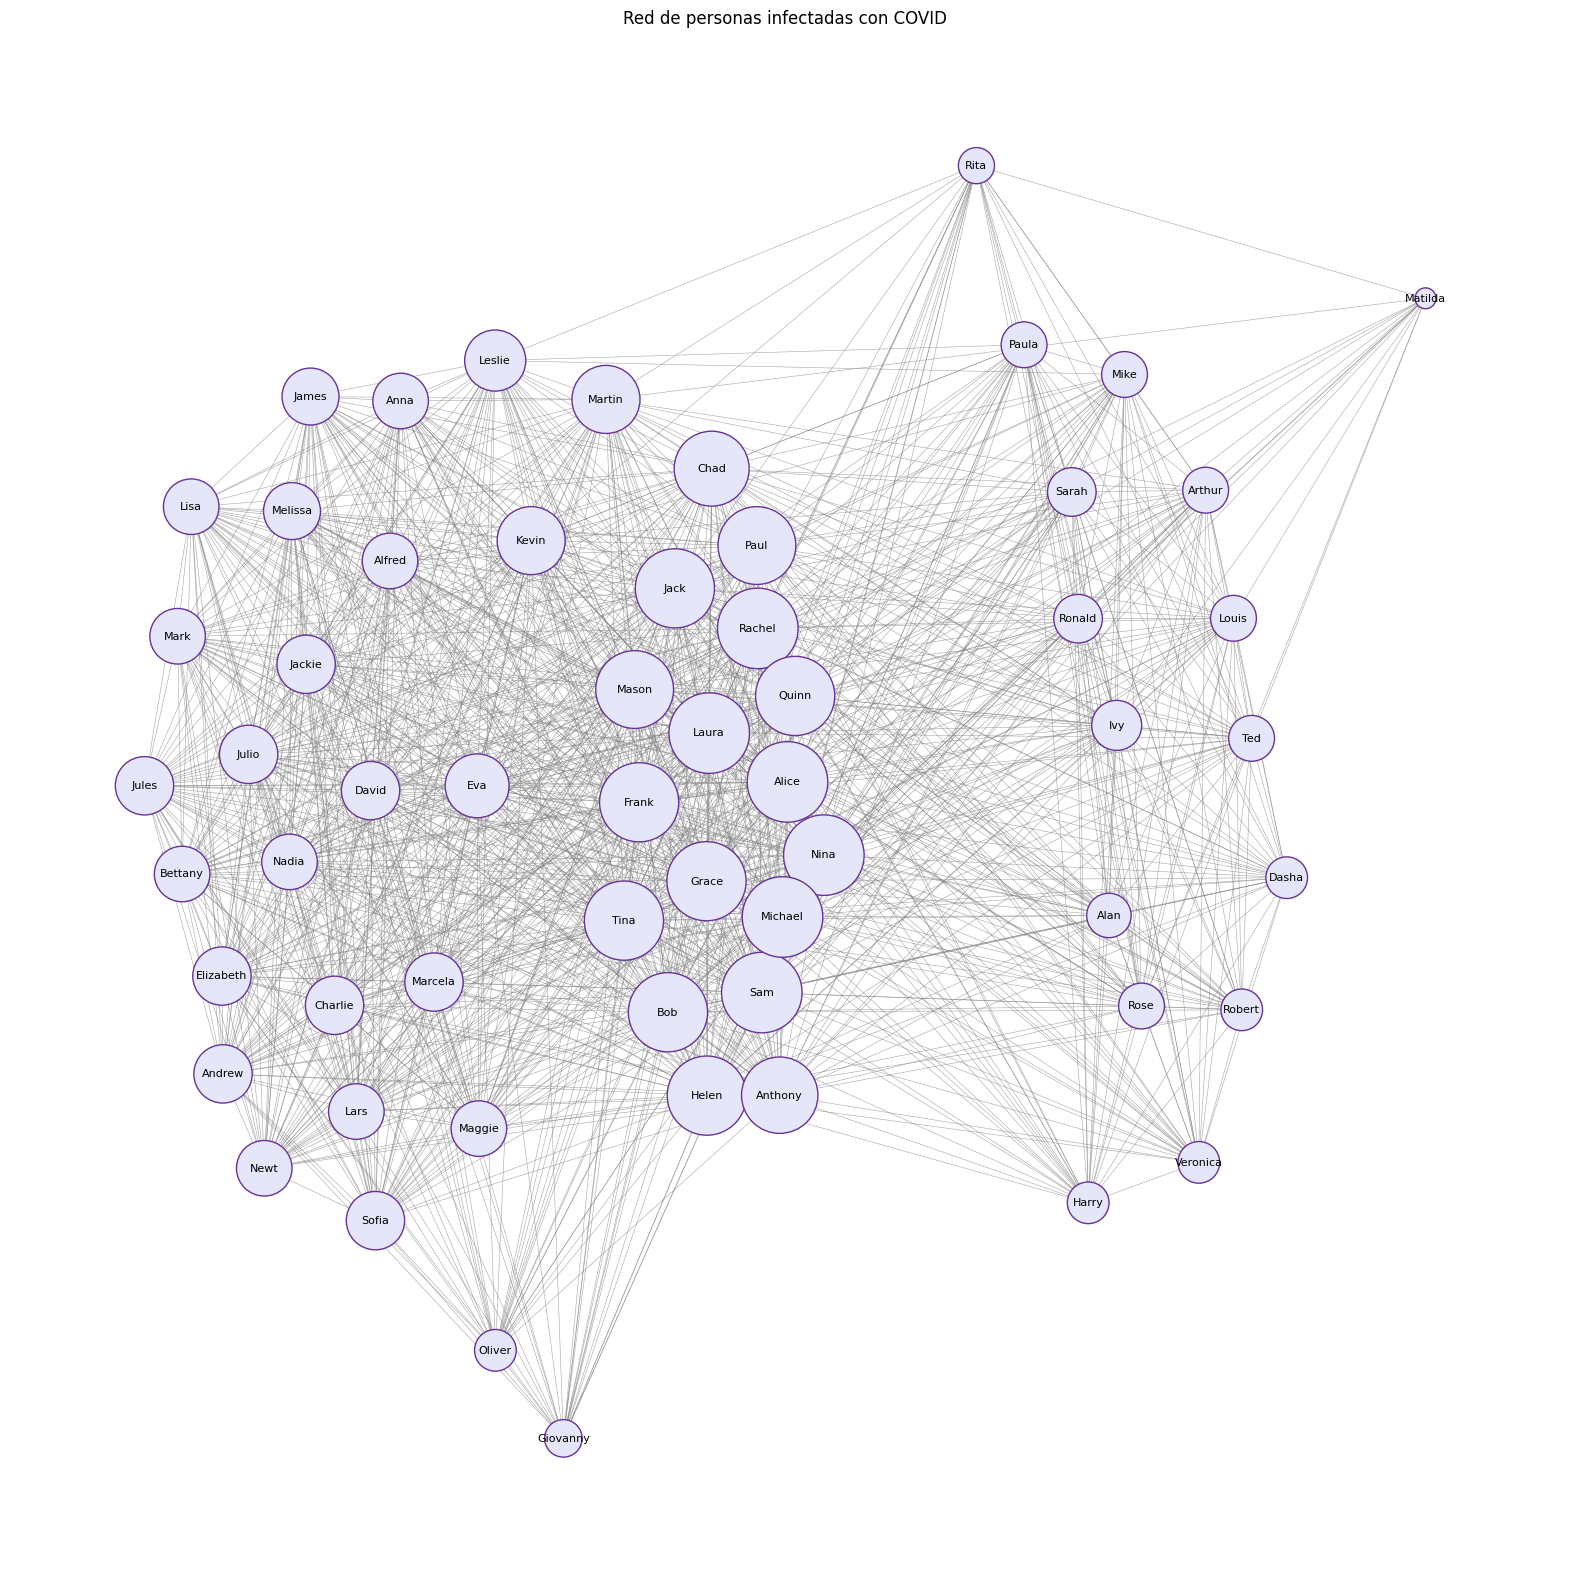

In [40]:
# Red de personas infectadas con COVID:

layout_h = nx.spring_layout(h, k=0.1, iterations=50)

labels = {node: h.nodes[node].get('label', f'Node {node}') for node in h.nodes}

plt.figure(figsize=(20, 20))

# Nodos de la red
nx.draw_networkx_nodes(h, 
                       layout_h, 
                       node_size=[(h.degree(v)) ** 2 for v in h.nodes()], # tamaños basados en h.degree
                       node_color='lavender',
                       edgecolors='rebeccapurple',
                       linewidths=1)

# Aristas de la red
nx.draw_networkx_edges(h, layout_h, width=0.4, alpha=0.7, edge_color="gray")

# Etiquetas de los nodos
node_labels = dict(zip(labels, labels))
nx.draw_networkx_labels(h, layout_h, labels=node_labels,
                       font_size=8)

plt.axis('off')
plt.title("Red de personas infectadas con COVID")


plt.show()

#### Red de personas infectadas con COVID:
- En este grafo, los nodos representan personas y las aristas indican que dos personas han sido infectadas por la misma variante de COVID.
- las comunidades o subgrupos en esta red pueden indicar grupos de personas que tienen alta probabilidad de haber compartido entornos similares, lo que llevó a la infección por la misma variante de COVID.
- las personas "aisladas" que interactúan con múltiples comunidades pueden ser individuos que se mueven entre diferentes grupos, actuando como puentes para la transmisión de las enfermedades.

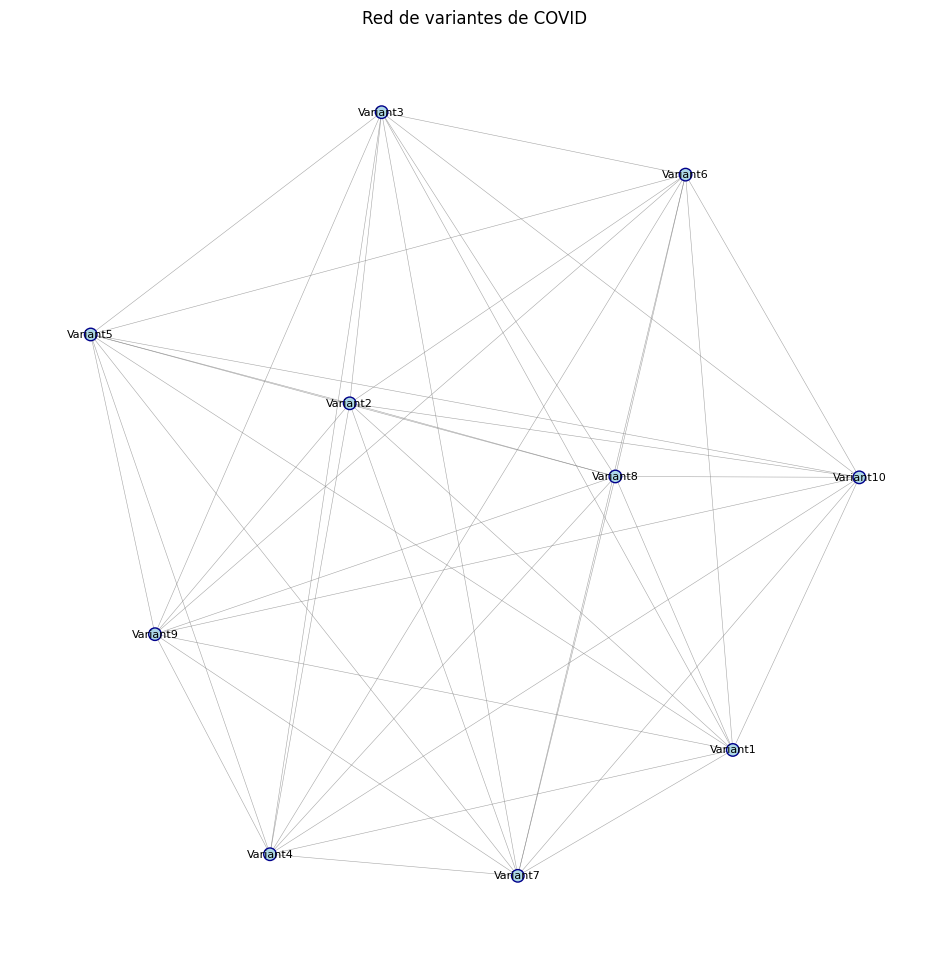

In [41]:
# Red de variantes de COVID:

layout_g_variant = nx.spring_layout(g_variantes, k=0.1, iterations=50)

labels_variant = {node: g_variantes.nodes[node].get('label', f'Node {node}') for node in g_variantes.nodes}

plt.figure(figsize=(12,12))

# Nodos de la red
nx.draw_networkx_nodes(g_variantes, 
                       layout_g_variant, 
                       node_size=[(g_variantes.degree(v)) ** 2 for v in g_variantes.nodes()], # tamaños basados en g_variant.degree
                       node_color='lightblue',  # Cambia el color según prefieras
                       edgecolors='darkblue',  # Cambia el color del borde según prefieras
                       linewidths=1)

# Aristas de la red
nx.draw_networkx_edges(g_variantes, layout_g_variant, width=0.4, alpha=0.7, edge_color="gray")

# Etiquetas de los nodos
node_labels_variant = dict(zip(labels_variant, labels_variant))
nx.draw_networkx_labels(g_variantes, layout_g_variant, labels=node_labels_variant,
                       font_size=8)

plt.axis('off')
plt.title("Red de variantes de COVID")

plt.show()


#### Proyección de variantes COVID:
- Los nodos representan variantes de COVID y las aristas indican que dos variantes han infectado a la misma persona.
- Esta red muestra cómo diferentes variantes se interconectan a través de la transmisión a individuos comunes, por ejemplo si un individuo se infectó por una variante y luego de otra, estas dos variantes estarán conectadas en este grafo.
- La densidad de conexiones entre variantes puede indicar la prevalencia o potencial de transmisión cruzada entre variantes.



#### Relación de los grafos de proyección con la red bipartita:
- En la red bipartita, los nodos representan tanto a las personas como a las variantes (en el mismo grafo) y las aristas representan las infecciones de personas por variantes específicas.
- Las comunidades o subgrupos que se perciben en el grafo de la proyección de personas, reflejan patrones de interacción que no son evidentes en la red bipartita.
- Los grafos de las proyecciones permiten enfocarse en un tipo de nodo a la vez, en este caso, personas o variantes, permitiendo la identificación de patrones o relaciones. Por ejemplo, una comunidad densamente conectada en la red de personas puede no ser evidente en la red bipartita en el caso de que las personas están conectadas a través de diferentes variantes. A su vez, la proyección de variantes puede ser el resultado de infecciones en individuos que no están directamente conectados en la red bipartita.